## Galton's Box

The following figure depicts Galton's box, a game in which marbles are dropped through N rows of pins.  In row 0, there is one position a marble can be in (labeled 0), in row 1, there are two positions (labeled 0 and 1), and so forth.  Each time the marble bounces from one row to the next, there is a 50% probability it bounces left and a 50% probability it bounces right. 

<img src="Galton_Box.png">
<img src="Galton2.jpg">

Notice that if a marble is in position x of row y, and it bounces left, it ends up in position x of row y+1.  If it bounces right, it ends up in position x+1.

1\. Create a class, **Marble**, to represent a single Marble that will drop through Galton's Box. 
- Include attributes to represent the position of the marble.  
- The ```__init__``` method should accept a one-character label for use when printing the Marble.

2\. Create a class, **GaltonBox**, to represent the overall setup.  You should include the following methods:

- ```__init__``` - Your initializer should accept the size of the box (number of rows including the start row), N.
- ```insert_marble``` - This method should accept a Marble instance and sets its position to position 0, row 0.
- ```time_step``` - This method should cause all Marbles in Galton's box to bounce to the next row, dropping left or right with equal probability.  When a marble reaches row N-1 at the bottom of the box, it should not move any more.  Note that you should simply allow marbles to occupy the same position (instead of working out a system to prevent a Marble from entering a position if another Marble is already there).
    - You can import the random library to decide which way the marble bounces: https://docs.python.org/3.7/library/random.htm
    - If you import random, please import it at the top of your block instead of inside the class / methods.
    
- `__str__` and `__repr__` - Include methods to display the Marbles currently in the box.  To keep things simple, if there are multiple Marbles in a given position, you only have to display one of the labels.

Your classes should mimic the following behavior (except that the horizontal positions are random):

```
>>> m1 = Marble("x")
>>> m2 = Marble("o")
>>> box = GaltonBox(3)
>>> box.insert_marble(m1)
>>> box
x
--
---
>>> box.time_step()
>>> box
-
-x
---
>>> box.insert_marble(m2)
>>> box
o
-x
---
>>> box.time_step()
>>> box
-
o-
-x-
>>> box.time_step()
>>> box
-
--
ox-
```



In [1]:
# YOUR CODE HERE
import random
import matplotlib.pyplot as plt
import numpy as np
bounce_choice = [0, 1]
class Marble:
    #Use the __init__ dunder method to initialize marbles and set the marble's row and column values to 0:
    def __init__(self, name):
        self.row = 0
        self.column = 0
        self.name = name

class GaltonBox:
    #Define an empty list in which we will store the marbles:
    def __init__(self, numOfRows):
        self.numOfRows = numOfRows
        #Initialize Galton's Box:
        self.box = ["-" * i for i in range(1, numOfRows + 1)]
        self.marbleList = []
        
    def insert_marble(self, marble):
        self.box[0] = marble.name
        #Append marble to the marbleList
        self.marbleList.append(marble)
    
    def time_step(self):
        #For each marble:
        for i in self.marbleList:
            #Bounces either left or right (increases both row and column by 1, or just the row by 1):
            bounce = random.choice(bounce_choice)
            #Make sure marble isn't at the bottom. If it is at the bottom, then don't let the marble move at all:
            if i.row != self.numOfRows-1:
                #Since strings are immutable, we will convert the row to a list, change one speicific position to "-",
                #and join the list to a string again:
                self.box[i.row] = list(self.box[i.row])
                self.box[i.row][i.column] = "-"
                self.box[i.row] = ''.join(self.box[i.row])
                #Increase row by 1, regardless of which column the marble lands in:
                i.row += 1
                i.column += bounce
                self.box[i.row] = list(self.box[i.row])
                self.box[i.row][i.column] = i.name
                self.box[i.row] = ''.join(self.box[i.row])
                
    #Use the __repr__ dunder method to print Galton's Box when the print() function tries to print an instance created
    #from the GaltonBox class:

    def __repr__(self):
        box = ""
        for a in self.box:
            box += a + "\n"
        return box


In [2]:
# tests to compare the code with the expected output.

# The string representation should match?

box = GaltonBox(3)
box.insert_marble(Marble("o"))
print(box)
print(str(box) == 'o\n--\n---\n')

o
--
---

True


In [3]:
# tests to compare the code with the expected output.

# The time-step method should work as expected?

import random
random.seed(1234)

box.time_step()
print(box)
print(str(box) == '-\n-o\n---\n')

-
-o
---

True


**Further Investigation: write code to create a box with 20 rows, insert a 100 Marbles, and repeatedly call time_step() until all Marbles are at the bottom. Display a histogram of the final Marble positions.**

(array([1., 2., 3., 2., 0., 1.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

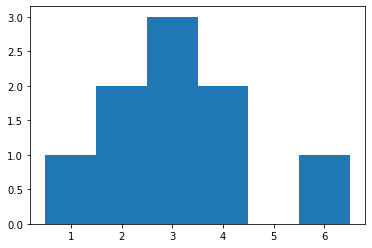

In [5]:
# code below

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_positions = (2,3,4,6,7,4,3,2,3,1)
cutoffs = np.arange(min(x_positions) - .5, max(x_positions)+.5)
plt.hist(x_positions, bins = cutoffs)

(array([10.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Patch objects>)

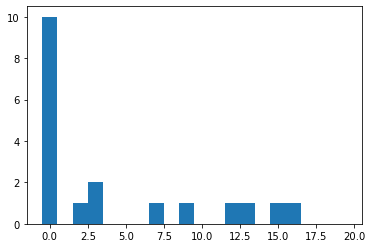

In [6]:
# YOUR CODE HERE
#Make a board with 20 rows, and insert 100 marbles (for the bonus investigation)


box1 = GaltonBox(20)
for i in range(100):
    box1.insert_marble(Marble("O"))

#Make all the marbles drop to the botton row:    

for i in range(20):
    box1.time_step()

#Record how many marbles landed in each column of the bottom row and store it in a x_positions list.
    
x_positions = [0 for i in range (20)]

for marble in box1.marbleList:
    x_positions[marble.column] += 1
    
#Create a histogram representation of the x_positions list using matplotlib:
    
    
cutoffs = np.arange(min(x_positions) - .5, max(x_positions)+.5)
plt.hist(x_positions, bins = cutoffs)

Investigation analysis:

More marbles land on Position 0, row 19 compared to all the other randomly scattered marbles.
This is because when the marble goes right, it scatters randomly across the histrogram. But when the marble goes down all 20 times, it increases its rows, but not its columns. Thus, more marbles land on row 19 position 0.